### Approximating definite integrals with Trapezoidal and Simpson Composite


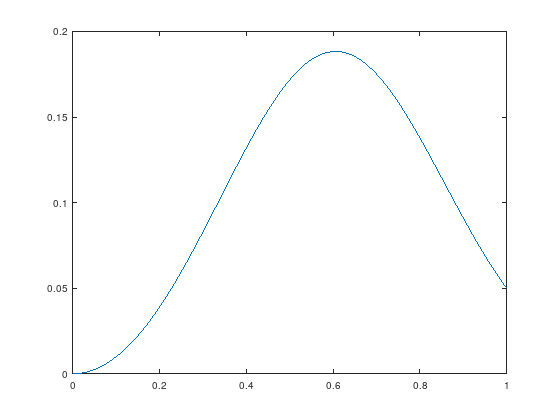

In [1]:
# The function to approximate:

function y = f(x)
    y = x.^2 .* e.^(-3.*x.^3);
end

definiteIntegralBounds = [0, 1];
X = linspace(definiteIntegralBounds(1),definiteIntegralBounds(2));
plot(X, f(X));

#### Simpson Composite

Let:

$ h $ be the width of some interval, familiar from the fundamental theorem of Calculus

$ n $ be the number of intervals to use in the approximation

$ i $ be an ordered sequence of odd numbers, starting at $ 1 $ and ending with $ n-1 $, eg $ 1,3,5... $

Let there be two intervals, each $ I $

$ f $ be some function to approximate the area of, within a chosen interval (the composition of all $ I $)

$ I_{i-1} $ be the lower end of the first interval

$ I_{i} $ be the middle between the two intervals

$ I_{i+1} $ be the upper end of the second interval

$ A = \sum{\frac{h}{3}(f(I_{i-1}) + 4f(I_i) + f(I_{i+1}))} $, be the approximate area

In [2]:
function A = simpsonCompositeApproximation(f, n, definiteIntegralBounds)
    h = abs(definiteIntegralBounds(2) - definiteIntegralBounds(1))/n;
    A = 0;

    for i =1:2:n-1
        I_lower = (i-1)*h;
        I = (i)*h;
        I_upper = (i+1)*h;
        A = A + (h/3)*(f(I_lower)+(4*f(I))+f(I_upper));
    end
end

### Trapezoidal rule

This is more intuitive. Given some interval, its two sides are the sides of a trapezoid.

Let:

$ h $ be the width of some interval, familiar from the fundamental theorem of Calculus

$ n $ be the number of intervals to use in the approximation

$ i $ be an ordered sequence of numbers, 1:n

$ f $ be some function to approximate the area of, within a chosen interval (the composition of all $ I $)

$ I_{i-1} $ be the lower end of the interval

$ I_{i+1} $ be the upper end of the interval

$ A = \sum{h\frac{f(I_{i-1}) + f(I_i)}{2}} $, be the approximate area

In [3]:
function A = trapezoidalApproximation(f, n, definiteIntegralBounds)
    h = abs(definiteIntegralBounds(2) - definiteIntegralBounds(1))/n;
    A = 0;

    for i =1:n
        I_lower = (i-1)*h;
        I_upper = i*h;
        A = A + h *(f(I_lower)+f(I_upper))/2;
    end
end

In [4]:
### we can get a reasonably good approximation by definint accuracy against the 
### diminishing difference between consecutive estimates

accuracy = 4;

i = 2;
approxArea_i =  simpsonCompositeApproximation(@f, i, definiteIntegralBounds);
i = i + 1;
approxArea_ip1 =  simpsonCompositeApproximation(@f, i, definiteIntegralBounds);

while abs(approxArea_ip1 - approxArea_i) > 10^(-accuracy)
    approxArea_i =  approxArea_ip1;
    i = i + 1;
    approxArea_ip1 = simpsonCompositeApproximation(@f, i, definiteIntegralBounds);
end

disp("Simpson Composite")
sprintf("Area is approx %f after computing with %d intervals", approxArea_ip1, i)

i = 2;
approxArea_i =  trapezoidalApproximation(@f, i, definiteIntegralBounds);
i = i + 1;
approxArea_ip1 =  trapezoidalApproximation(@f, i, definiteIntegralBounds);

while abs(approxArea_ip1 - approxArea_i) > 10^(-accuracy)
    approxArea_i =  approxArea_ip1;
    i = i + 1;
    approxArea_ip1 = trapezoidalApproximation(@f, i, definiteIntegralBounds);
end

disp("Trapezoidal")
sprintf("Area is approx %f after computing with %d intervals", approxArea_ip1, i)

Simpson Composite
ans = Area is approx 0.105480 after computing with 503 intervals
Trapezoidal
ans = Area is approx 0.105220 after computing with 9 intervals


In [5]:
trapezoidalApproximation(@f, 100, definiteIntegralBounds)

ans =  0.10558
